In [1]:
#pip install yfinance
#pip install pandas

In [27]:
import yfinance as yf
import pandas as pd
import wget


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [30]:
apple = yf.Ticker('AAPL')
print(apple)
# Ticker must be with capital T

yfinance.Ticker object <AAPL>


In [46]:
import wget
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json'
filename = wget.download(url)
print(filename)

apple (1).json


##  Stock Info

In [45]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    apple_info['country']

## Extracting Share Price

A share is the single smallest part of a company's stock that you can buy, the prices of these shares fluctuate over time. Using the history() method we can get the share price of the stock over a certain period of time. Using the period parameter we can set how far back from the present to get data. The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [38]:
apple_share_price_data = apple.history(period="max")


The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [39]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0


In [41]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


<Axes: xlabel='Date'>

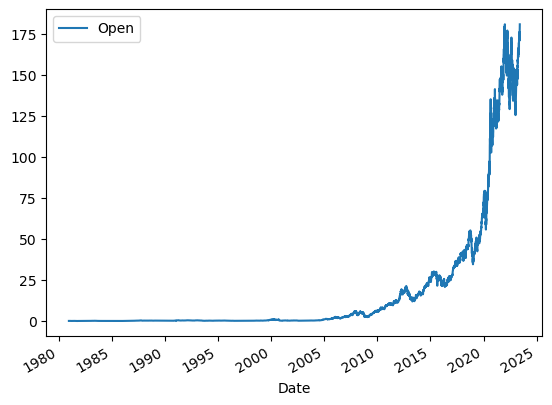

In [42]:
apple_share_price_data.plot(x="Date",y="Open")

## Extracting Divident

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [43]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-05-06 00:00:00-04:00    0.230000
2022-08-05 00:00:00-04:00    0.230000
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
Name: Dividends, Length: 79, dtype: float64

<Axes: xlabel='Date'>

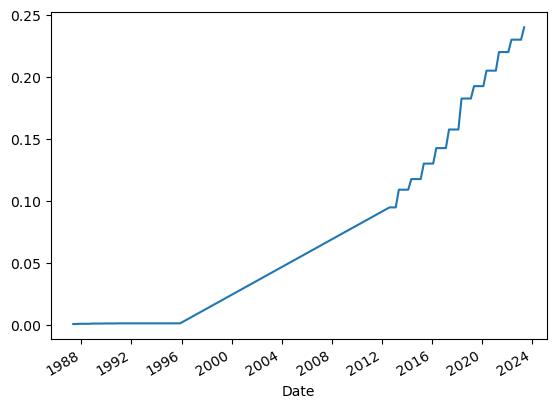

In [44]:
apple.dividends.plot()
